In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [2]:
# Import Train and Test Data 
logins = '/Users/Administrator/Desktop/'
#i = pd.date_range('2018-04-09', periods=15)
loginsf =  pd.read_json(logins + 'logins.json') 
loginsdf = pd.DataFrame(loginsf)
loginsdf


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


First , exploring this dataset if I have missing values and if I need to clean it.

In [3]:
loginsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
loginsdf.shape

(93142, 1)

Just to have a common sense about the dataset

In [5]:
loginsdf.describe().T

,count,unique,top,freq,first,last
login_time,93142,92265,1970-02-12 11:16:53,3,1970-01-01 20:12:16,1970-04-13 18:57:38


In [6]:
loginsdf.min()

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand

In [7]:
loginset = loginsdf.set_index('login_time')
loginset

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [8]:
loginset.index = pd.to_datetime(loginset.index, unit='min')

In [9]:
loginsdf['login_time'] =  pd.to_datetime(loginsdf['login_time'], format='%d%b%Y:%H:%M:%S.%f')

In [75]:
loginsdf['login_time'].dtype

dtype('<M8[ns]')

In [63]:
loginset.index.dtype

dtype('<M8[ns]')

login counts based on 15­minute time intervals

In [74]:
logins = loginset.resample('15min').count()

In [71]:
logins 

""
login_time
1970-01-01 20:00:00
1970-01-01 20:15:00
1970-01-01 20:30:00
1970-01-01 20:45:00
1970-01-01 21:00:00
...
1970-04-13 17:45:00
1970-04-13 18:00:00
1970-04-13 18:15:00


visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

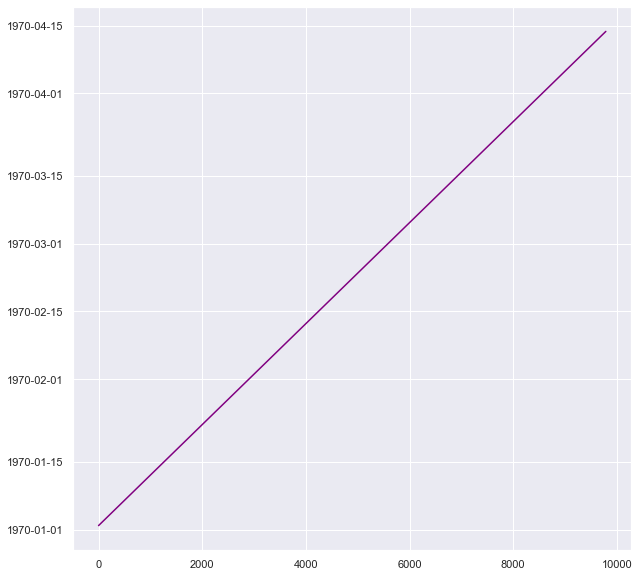

In [79]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(logins.index,
                color='purple')

# Set title and labels for axes
ax.set(xlabel="",
             title="")

plt.show()

In [49]:
loginsdf['day'] = loginsdf['login_time'].dt.date


In [83]:
logins['day'] = logins.index.date

In [84]:
logins

,day
login_time,
1970-01-01 20:00:00,1970-01-01
1970-01-01 20:15:00,1970-01-01
1970-01-01 20:30:00,1970-01-01
1970-01-01 20:45:00,1970-01-01
1970-01-01 21:00:00,1970-01-01
...,...
1970-04-13 17:45:00,1970-04-13
1970-04-13 18:00:00,1970-04-13
1970-04-13 18:15:00,1970-04-13


In [38]:
loginsdf.day.duplicated().value_counts(dropna=False) 

True     93039
False      103
Name: day, dtype: int64

In [39]:
hist= loginsdf['day'].value_counts(dropna=False)

(array([ 1.,  5., 21., 24., 17., 13.,  7., 11.,  3.,  1.]),
 array([ 112. ,  289.7,  467.4,  645.1,  822.8, 1000.5, 1178.2, 1355.9,
        1533.6, 1711.3, 1889. ]),
 <a list of 10 Patch objects>)

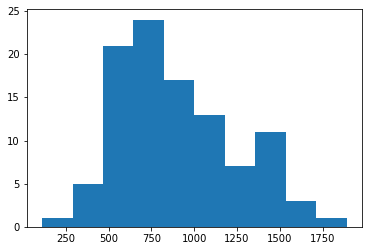

In [19]:
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(hist)

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([719163. , 719173.2, 719183.4, 719193.6, 719203.8, 719214. ,
        719224.2, 719234.4, 719244.6, 719254.8, 719265. ]),
 <a list of 9788 Lists of Patches objects>)

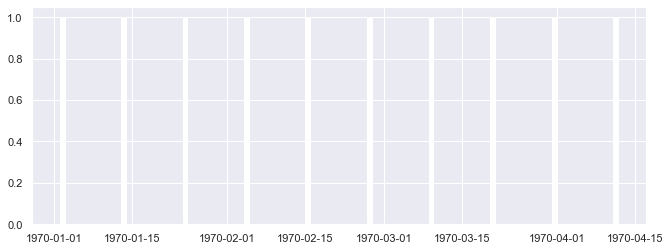

In [85]:
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(logins)